## Mel Frequency Cepstral Coefficient MFCC
### Steps at a Glance 
We will give a high level intro to the implementation steps, then go in depth why we do the things we do. Towards the end we will go into a more detailed description of how to calculate MFCCs.

1. Frame the signal into short frames --> 25ms is STD 
2. For each frame calculate the periodogram estimate of the power spectrum.
3. Apply the mel filterbank to the power spectra, sum the energy in each filter.
4. Take the logarithm of all filterbank energies.
5. Take the DCT of the log filterbank energies.
6. Keep DCT coefficients 2-13, discard the rest.

There are a few more things commonly done, sometimes the frame energy is appended to each feature vector. Delta and Delta-Delta features are usually also appended. Liftering is also commonly applied to the final features.

In [1]:
import numpy as np
import scipy.io.wavfile as wav
import os
import csv # create the datastet from the audio data
import matplotlib.pyplot as plt
import librosa as l

In [2]:
# audio data foldel
wav_data = '../16000_pcm_speeches/'
os.listdir(wav_data)

['tf_Wav_reader.py',
 'Nelson_Mandela',
 'Jens_Stoltenberg',
 'Benjamin_Netanyau',
 'other',
 'Julia_Gillard',
 '_background_noise_',
 'Magaret_Tarcher']

In [3]:
check_folder = '../16000_pcm_speeches/Nelson_Mandela'
print("tot files:", len(os.listdir(check_folder)))
os.listdir(check_folder)

tot files: 1500


['1452.wav',
 '526.wav',
 '880.wav',
 '430.wav',
 '1319.wav',
 '1167.wav',
 '902.wav',
 '167.wav',
 '1031.wav',
 '592.wav',
 '104.wav',
 '1492.wav',
 '1164.wav',
 '941.wav',
 '663.wav',
 '710.wav',
 '875.wav',
 '99.wav',
 '937.wav',
 '1273.wav',
 '525.wav',
 '574.wav',
 '1192.wav',
 '1490.wav',
 '1090.wav',
 '513.wav',
 '365.wav',
 '148.wav',
 '184.wav',
 '900.wav',
 '1487.wav',
 '961.wav',
 '529.wav',
 '11.wav',
 '1415.wav',
 '1431.wav',
 '985.wav',
 '682.wav',
 '121.wav',
 '884.wav',
 '654.wav',
 '982.wav',
 '516.wav',
 '1253.wav',
 '249.wav',
 '1396.wav',
 '1264.wav',
 '1383.wav',
 '1179.wav',
 '832.wav',
 '45.wav',
 '1476.wav',
 '290.wav',
 '1281.wav',
 '878.wav',
 '5.wav',
 '1000.wav',
 '116.wav',
 '1244.wav',
 '1011.wav',
 '822.wav',
 '626.wav',
 '1232.wav',
 '888.wav',
 '787.wav',
 '1108.wav',
 '1317.wav',
 '1338.wav',
 '1204.wav',
 '244.wav',
 '853.wav',
 '1077.wav',
 '958.wav',
 '501.wav',
 '348.wav',
 '346.wav',
 '535.wav',
 '162.wav',
 '398.wav',
 '726.wav',
 '425.wav',
 '13

sample_rate[Hz]: 16000


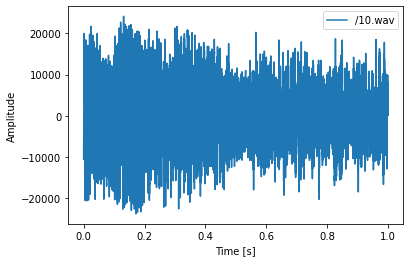

In [4]:
# from dataset description the wav is 1s file at 16kHz sample rate PCM encoded
file_name = '/10.wav'
sample_rate, signal = wav.read(check_folder+file_name)
print("sample_rate[Hz]:", sample_rate)
time = np.linspace(0., 1.0, signal.shape[0])
plt.plot(time, signal, label=file_name)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [6]:
# use the librosa API for the MFCC

signal, sample_rate = l.load(check_folder+file_name, sr=16000) # you are sure of sampling rate info
print("sample_rate[Hz]:", sample_rate)
print("tot samples:", signal.shape)
mfcc_features = l.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=int(0.010*sample_rate), 
                                    n_fft=int(0.025*sample_rate))
mfcc_features.shape

sample_rate[Hz]: 16000
tot samples: (16000,)


(13, 101)

In [7]:
delta_mfcc = l.feature.delta(mfcc_features)
delta_mfcc.shape

(13, 101)

In [8]:
delta2_mfcc = l.feature.delta(mfcc_features, order=2)
delta2_mfcc.shape

(13, 101)

In [9]:
mfcc_total_1_audio = np.concatenate((mfcc_features, delta_mfcc, delta2_mfcc))
mfcc_total_1_audio.shape

(39, 101)

In [11]:
sample_rate = 16000
check_folder = '../16000_pcm_speeches/Nelson_Mandela/'
tot_audio_files_Mandela = len(os.listdir(check_folder))
print("tot file audio:", tot_audio_files_Mandela)

print("analyze file audio number:",0)
file_audio = check_folder+'/0.wav'
signal, sample_rate = l.load(file_audio, sr=sample_rate)
mfcc_features = l.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=int(0.010*sample_rate), 
                                    n_fft=int(0.025*sample_rate))
delta_mfcc = l.feature.delta(mfcc_features)
delta2_mfcc = l.feature.delta(mfcc_features, order=2)
data_partial = np.concatenate((mfcc_features, delta_mfcc, delta2_mfcc))

Mandela_data = data_partial
print(Mandela_data.shape)

for i in range(1,tot_audio_files_Mandela):
    #print("analyze file audio number:",i)
    file_audio = check_folder+str(i)+'.wav'
    signal, sample_rate = l.load(file_audio, sr=sample_rate)
    mfcc_features = l.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=int(0.010*sample_rate), 
                                    n_fft=int(0.025*sample_rate))
    delta_mfcc = l.feature.delta(mfcc_features)
    delta2_mfcc = l.feature.delta(mfcc_features, order=2)
    data_partial = np.concatenate((mfcc_features, delta_mfcc, delta2_mfcc))
    
    Mandela_data = np.concatenate((Mandela_data, data_partial), axis=1)

Mandela_data.shape  

tot file audio: 1500
analyze file audio number: 0
(39, 101)


(39, 151500)

In [12]:
sample_rate = 16000
check_folder = '../16000_pcm_speeches/Benjamin_Netanyau/'
tot_audio_files_Netanyau = len(os.listdir(check_folder))
print("tot file audio:", tot_audio_files_Netanyau)

print("analyze file audio number:",0)
file_audio = check_folder+'0.wav'
signal, sample_rate = l.load(file_audio, sr=sample_rate)
mfcc_features = l.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=int(0.010*sample_rate), 
                                    n_fft=int(0.025*sample_rate))
delta_mfcc = l.feature.delta(mfcc_features)
delta2_mfcc = l.feature.delta(mfcc_features, order=2)
data_partial = np.concatenate((mfcc_features, delta_mfcc, delta2_mfcc))

Netanyau_data = data_partial
print(Netanyau_data.shape)

for i in range(1,tot_audio_files_Netanyau):
    #print("analyze file audio number:",i)
    file_audio = check_folder+str(i)+'.wav'
    signal, sample_rate = l.load(file_audio, sr=sample_rate)
    mfcc_features = l.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=int(0.010*sample_rate), 
                                    n_fft=int(0.025*sample_rate))
    delta_mfcc = l.feature.delta(mfcc_features)
    delta2_mfcc = l.feature.delta(mfcc_features, order=2)
    data_partial = np.concatenate((mfcc_features, delta_mfcc, delta2_mfcc))
    
    Netanyau_data = np.concatenate((Netanyau_data, data_partial), axis=1)

Netanyau_data.shape

tot file audio: 1500
analyze file audio number: 0
(39, 101)


(39, 151500)

In [15]:
sample_rate = 16000
check_folder = '../16000_pcm_speeches/Magaret_Tarcher/'
tot_audio_files_Tarcher = len(os.listdir(check_folder))
print("tot file audio:", tot_audio_files_Tarcher)

print("analyze file audio number:",0)
file_audio = check_folder+'/0.wav'
signal, sample_rate = l.load(file_audio, sr=sample_rate)
mfcc_features = l.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=int(0.010*sample_rate), 
                                    n_fft=int(0.025*sample_rate))
delta_mfcc = l.feature.delta(mfcc_features)
delta2_mfcc = l.feature.delta(mfcc_features, order=2)
data_partial = np.concatenate((mfcc_features, delta_mfcc, delta2_mfcc))

Tarcher_data = data_partial
print(Tarcher_data.shape)

for i in range(1,tot_audio_files_Tarcher):
    #print("analyze file audio number:",i)
    file_audio = check_folder+str(i)+'.wav'
    signal, sample_rate = l.load(file_audio, sr=sample_rate)
    mfcc_features = l.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=int(0.010*sample_rate), 
                                    n_fft=int(0.025*sample_rate))
    delta_mfcc = l.feature.delta(mfcc_features)
    delta2_mfcc = l.feature.delta(mfcc_features, order=2)
    data_partial = np.concatenate((mfcc_features, delta_mfcc, delta2_mfcc))
    
    Tarcher_data = np.concatenate((Tarcher_data, data_partial), axis=1)

Tarcher_data.shape

tot file audio: 1500
analyze file audio number: 0
(39, 101)


(39, 151500)

In [16]:
sample_rate = 16000
check_folder = '../16000_pcm_speeches/Jens_Stoltenberg/'
tot_audio_files_Stoltenberg = len(os.listdir(check_folder))
print("tot file audio:", tot_audio_files_Stoltenberg)

print("analyze file audio number:",0)
file_audio = check_folder+'/0.wav'
signal, sample_rate = l.load(file_audio, sr=sample_rate)
mfcc_features = l.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=int(0.010*sample_rate), 
                                    n_fft=int(0.025*sample_rate))
delta_mfcc = l.feature.delta(mfcc_features)
delta2_mfcc = l.feature.delta(mfcc_features, order=2)
data_partial = np.concatenate((mfcc_features, delta_mfcc, delta2_mfcc))

Stoltenberg_data = data_partial
print(Stoltenberg_data.shape)

for i in range(1,tot_audio_files_Stoltenberg):
    #print("analyze file audio number:",i)
    file_audio = check_folder+str(i)+'.wav'
    signal, sample_rate = l.load(file_audio, sr=sample_rate)
    mfcc_features = l.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=int(0.010*sample_rate), 
                                    n_fft=int(0.025*sample_rate))
    delta_mfcc = l.feature.delta(mfcc_features)
    delta2_mfcc = l.feature.delta(mfcc_features, order=2)
    data_partial = np.concatenate((mfcc_features, delta_mfcc, delta2_mfcc))
    
    Stoltenberg_data = np.concatenate((Stoltenberg_data, data_partial), axis=1)

Stoltenberg_data.shape

tot file audio: 1500
analyze file audio number: 0
(39, 101)


(39, 151500)

In [33]:
# create a csv file based on author_name, x_audio, k_frame, MFCC, MFCC_delta, MFCC_delta2
# no! save a simple file .npy
# Mandela = 0
# Netanyau = 1
# Tarcher = 2
# Stoltenberg = 3
flag_Mandela = np.zeros((39,1))
audio_data = np.concatenate((flag_Mandela ,Mandela_data), axis=1)
print(audio_data.shape)

flag_Netanyau = np.ones((39,1))
partial_data = np.concatenate((flag_Netanyau ,Netanyau_data), axis=1)
audio_data = np.concatenate((audio_data,partial_data))
print(audio_data.shape)

flag_Tarcher = np.ones((39,1))*2
partial_data = np.concatenate((flag_Tarcher ,Tarcher_data), axis=1)
audio_data = np.concatenate((audio_data,partial_data))
print(audio_data.shape)

flag_Stoltenberg = np.ones((39,1))*3
partial_data = np.concatenate((flag_Stoltenberg ,Stoltenberg_data), axis=1)
audio_data = np.concatenate((audio_data,partial_data))
print("final:",audio_data.shape)

np.save('audio_data_4_speeches.npy',audio_data)


(39, 151501)
(78, 151501)
(117, 151501)
final: (156, 151501)
